In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 어레이 데이터를 csv 파일로 저장하기
def save_data(fileName, arrayName, header=''):
    np.savetxt(fileName, arrayName, delimiter=',', header=header, comments='')

## 4.1 선형 회귀
### 4.1.1 정규 방정식

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
linreg_data = np.c_[X, y]
linreg_data

array([[7.49080238e-01, 6.33428778e+00],
       [1.90142861e+00, 9.40527849e+00],
       [1.46398788e+00, 8.48372443e+00],
       [1.19731697e+00, 5.60438199e+00],
       [3.12037281e-01, 4.71643995e+00],
       [3.11989041e-01, 5.29307969e+00],
       [1.16167224e-01, 5.82639572e+00],
       [1.73235229e+00, 8.67878666e+00],
       [1.20223002e+00, 6.79819647e+00],
       [1.41614516e+00, 7.74667842e+00],
       [4.11689886e-02, 5.03890908e+00],
       [1.93981970e+00, 1.01482102e+01],
       [1.66488528e+00, 8.46489564e+00],
       [4.24678221e-01, 5.78730210e+00],
       [3.63649934e-01, 5.18802735e+00],
       [3.66809020e-01, 6.06907205e+00],
       [6.08484486e-01, 5.12340036e+00],
       [1.04951286e+00, 6.82087644e+00],
       [8.63890037e-01, 6.19956196e+00],
       [5.82458280e-01, 4.28385989e+00],
       [1.22370579e+00, 7.96723765e+00],
       [2.78987721e-01, 5.09801844e+00],
       [5.84289297e-01, 5.75798135e+00],
       [7.32723687e-01, 5.96358393e+00],
       [9.121399

(0.0, 2.0, 0.0, 15.0)

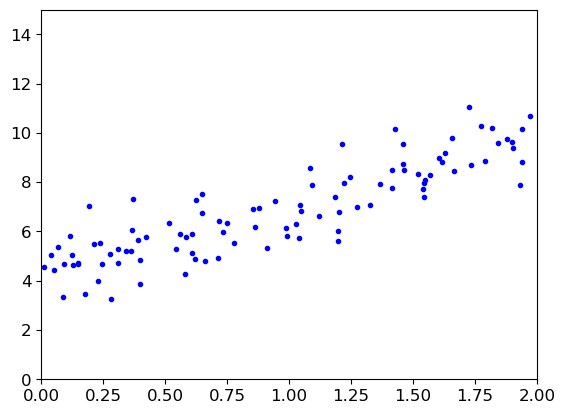

In [4]:
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])

In [5]:
X_b = np.c_[np.ones((100, 1)), X]
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [8]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

(0.0, 2.0, 0.0, 15.0)

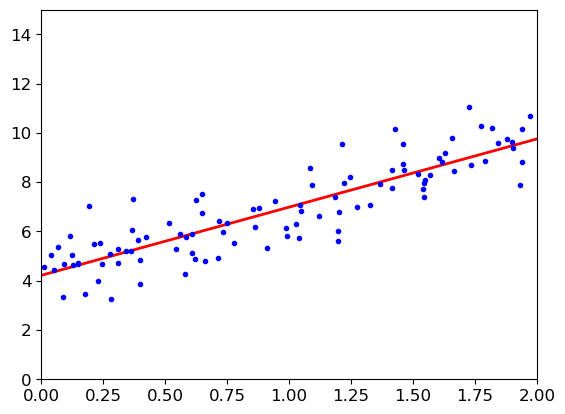

In [9]:
plt.plot(X_new, y_predict, 'r-', linewidth=2, label="Predictions")
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [12]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [13]:
import scipy
theta_best_svd, residuals, rank, s = scipy.linalg.lstsq(X_b, y)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [15]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

## 경사 하강법
### 배치 경사 하강법

In [16]:
eta = 0.1
n_iterations = 1000
m = 100

In [17]:
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

In [18]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')

    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)

        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

        if theta_path is not None:
            theta_path.append(theta)

    plt.axis([0, 2, 0, 15])

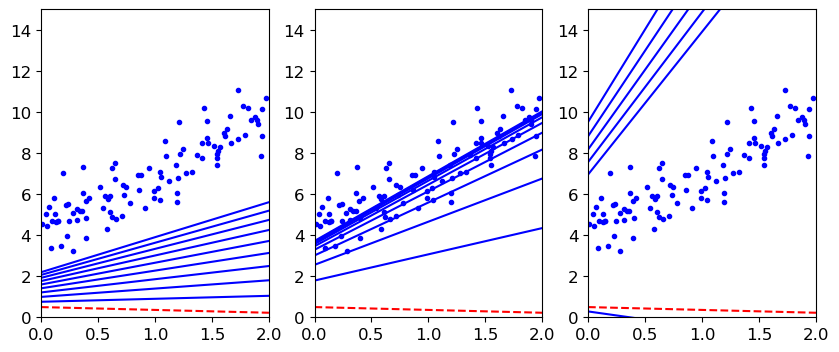

In [19]:
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))

plt.subplot(131); plot_gradient_descent(theta, eta=0.02)

plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

In [20]:
theta_path_sgd = []

m = len(X_b)
np.random.seed(42)

In [21]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

(0.0, 2.0, 0.0, 15.0)

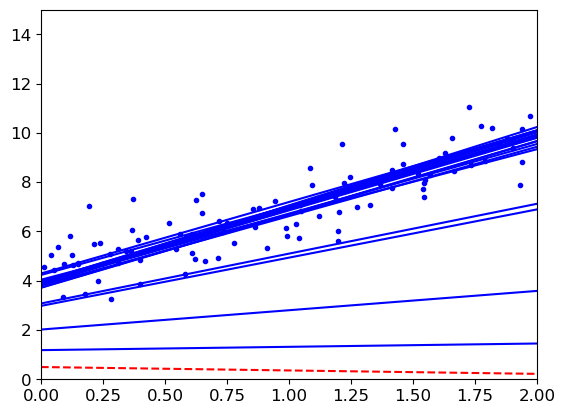

In [22]:
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])

In [23]:
theta

array([[4.21076011],
       [2.74856079]])

In [24]:
from sklearn.linear_model import SGDRegressor

In [25]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

## 4.3 다항 회귀

In [27]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

(-3.0, 3.0, 0.0, 10.0)

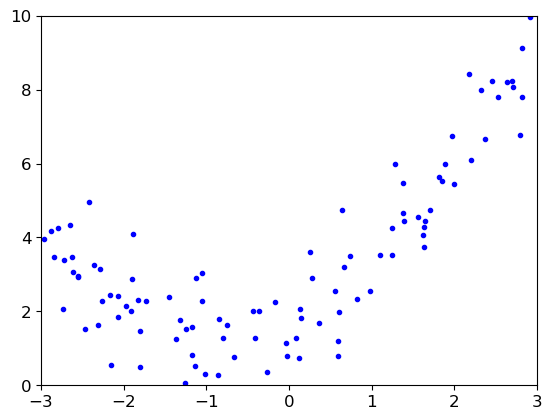

In [28]:
plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [31]:
X

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504],
       [-2.26777059],
       [-0.02893854],
       [-2.79366887],
       [ 2.45592241],
       [-1.44732011],
       [ 0

In [32]:
X_poly

array([[-7.52759287e-01,  5.66646544e-01],
       [ 2.70428584e+00,  7.31316190e+00],
       [ 1.39196365e+00,  1.93756281e+00],
       [ 5.91950905e-01,  3.50405874e-01],
       [-2.06388816e+00,  4.25963433e+00],
       [-2.06403288e+00,  4.26023172e+00],
       [-2.65149833e+00,  7.03044338e+00],
       [ 2.19705687e+00,  4.82705891e+00],
       [ 6.06690070e-01,  3.68072842e-01],
       [ 1.24843547e+00,  1.55859111e+00],
       [-2.87649303e+00,  8.27421218e+00],
       [ 2.81945911e+00,  7.94934969e+00],
       [ 1.99465584e+00,  3.97865194e+00],
       [-1.72596534e+00,  2.97895634e+00],
       [-1.90905020e+00,  3.64447265e+00],
       [-1.89957294e+00,  3.60837736e+00],
       [-1.17454654e+00,  1.37955958e+00],
       [ 1.48538590e-01,  2.20637127e-02],
       [-4.08329888e-01,  1.66733298e-01],
       [-1.25262516e+00,  1.56906979e+00],
       [ 6.71117368e-01,  4.50398522e-01],
       [-2.16303684e+00,  4.67872835e+00],
       [-1.24713211e+00,  1.55533850e+00],
       [-8.

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [34]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

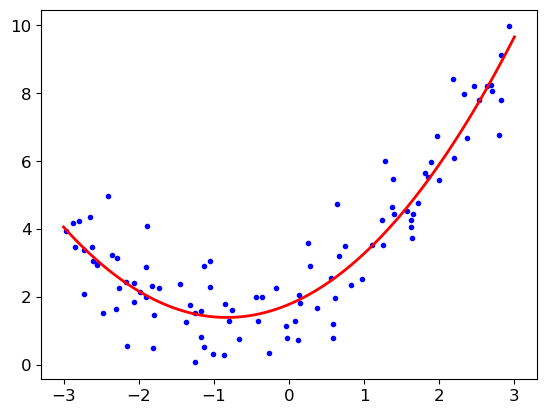

In [35]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')

plt.plot(X_new, y_new, 'r-', linewidth=2)

In [36]:
X_new_poly

array([[-3.00000000e+00,  9.00000000e+00],
       [-2.93939394e+00,  8.64003673e+00],
       [-2.87878788e+00,  8.28741965e+00],
       [-2.81818182e+00,  7.94214876e+00],
       [-2.75757576e+00,  7.60422406e+00],
       [-2.69696970e+00,  7.27364555e+00],
       [-2.63636364e+00,  6.95041322e+00],
       [-2.57575758e+00,  6.63452709e+00],
       [-2.51515152e+00,  6.32598714e+00],
       [-2.45454545e+00,  6.02479339e+00],
       [-2.39393939e+00,  5.73094582e+00],
       [-2.33333333e+00,  5.44444444e+00],
       [-2.27272727e+00,  5.16528926e+00],
       [-2.21212121e+00,  4.89348026e+00],
       [-2.15151515e+00,  4.62901745e+00],
       [-2.09090909e+00,  4.37190083e+00],
       [-2.03030303e+00,  4.12213039e+00],
       [-1.96969697e+00,  3.87970615e+00],
       [-1.90909091e+00,  3.64462810e+00],
       [-1.84848485e+00,  3.41689624e+00],
       [-1.78787879e+00,  3.19651056e+00],
       [-1.72727273e+00,  2.98347107e+00],
       [-1.66666667e+00,  2.77777778e+00],
       [-1.

## 4.4 학습 곡선

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [38]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2)
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3)

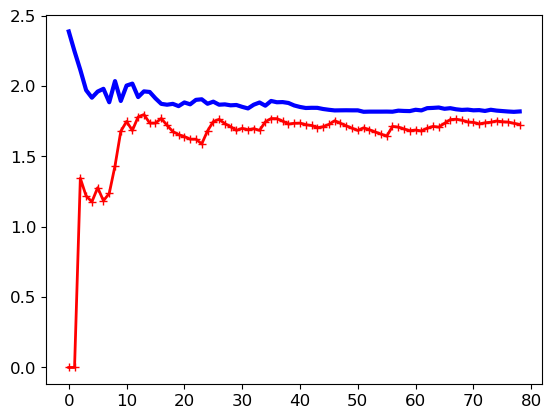

In [39]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [40]:
from sklearn.pipeline import Pipeline

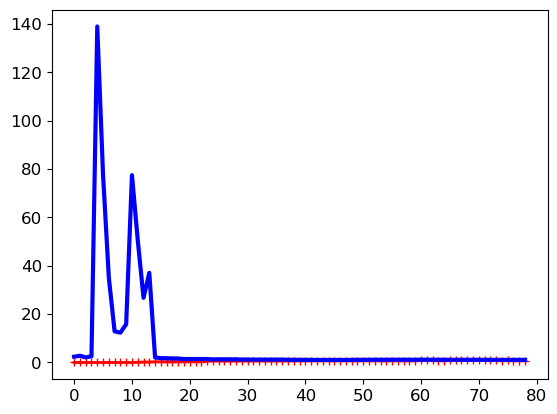

In [41]:
polynomical_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomical_regression, X, y)

## 4.5 규제가 있는 선형 모델
### 4.5.1 릿지 회귀

In [42]:
np.random.seed(42)

In [43]:
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [44]:
from sklearn.linear_model import Ridge

In [45]:
ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [46]:
ridge_reg = Ridge(alpha=1, solver='sag', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

In [47]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:',)):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                ('std_scalar', StandardScaler()),
                ('regul_reg', model)
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, 'b.', linewidth=3)
    plt.axis([0, 3, 0, 4])

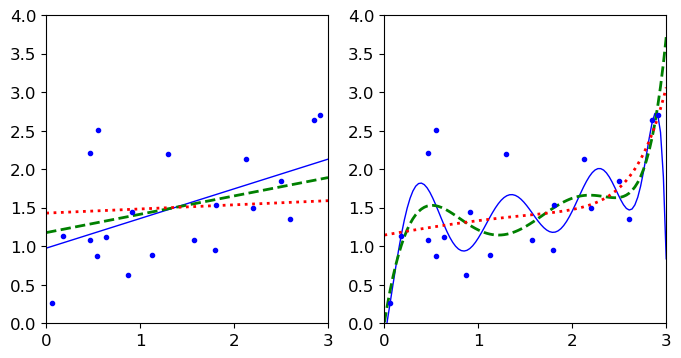

In [48]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

In [49]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [50]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46619232])

### 4.5.2 라쏘 회귀

In [51]:
from sklearn.linear_model import Lasso

In [52]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

/Users/taemin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


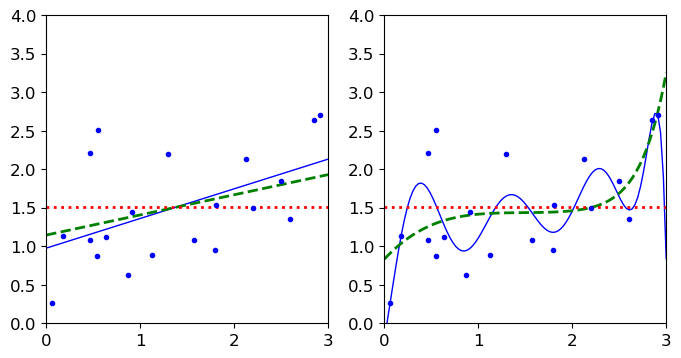

In [53]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

### 4.5.4 조기 종료

In [54]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(),test_size=0.5, random_state=10)

In [55]:
from copy import deepcopy

In [56]:
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=1e-3, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005,
                       random_state=42)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

/Users/taemin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/taemin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/taemin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/taemin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/taemin/an

In [57]:
sgd_reg = SGDRegressor(max_iter=1, tol=1e-3, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005,
                       random_state=42)

n_epochs = 500

train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

/Users/taemin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/taemin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/taemin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/taemin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/taemin/an

그림 저장: early_stopping_plot


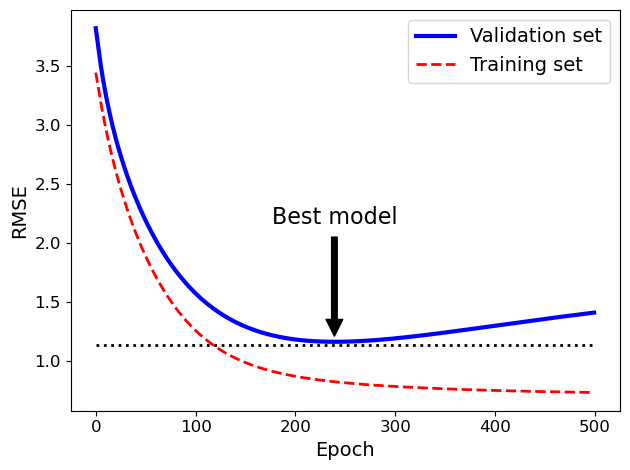

In [58]:
plt.annotate('Best model',                          # 도표에 문장 넣는 기능. 내용과 위치를 정확히 지정함.
             xy=(best_epoch, best_val_rmse),        # 색상, 폰트 크기 등등을 일일이 지정함.
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # 검정 실선을 잘 보여주기 위해서임.
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)  # 수평 검정 점선
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")    # 파랑 실선
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")   # 빵강 파선

# 기타 추가 정보
plt.legend(loc="upper right", fontsize=14)  # 범례
plt.xlabel("Epoch", fontsize=14)            # 축 정보
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")             # 저자가 사용하기 위해 그래프 저장하는 용도
plt.show()

## 4.6 로지스틱 회귀
### 4.6.3 결정 경계

In [59]:
from sklearn import datasets

In [60]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [62]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(int)

In [63]:
from sklearn.linear_model import LogisticRegression

In [71]:
log_reg = LogisticRegression(solver='lbfgs', random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

In [72]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

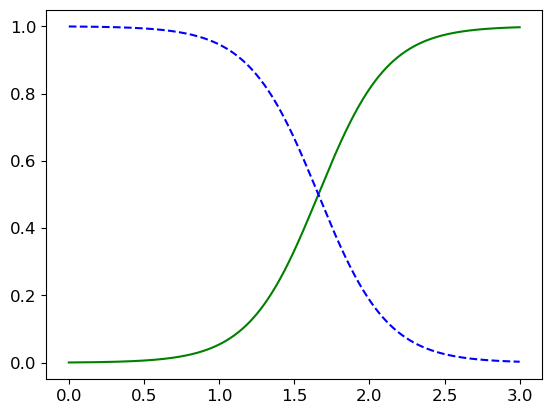

In [73]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label="Not Iris virginica")

In [74]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([1.66066066])

In [75]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [77]:
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.int)

log_reg = LogisticRegression(solver='lbfgs', C=10**10, random_state=42)
log_reg.fit(X, y)

/var/folders/j_/hylrqd052y9czkfmjyyc7n7r0000gn/T/ipykernel_6526/4172390050.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target'] == 2).astype(np.int)


LogisticRegression(C=10000000000, random_state=42)

In [78]:
x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

(2.9, 7.0, 0.8, 2.7)

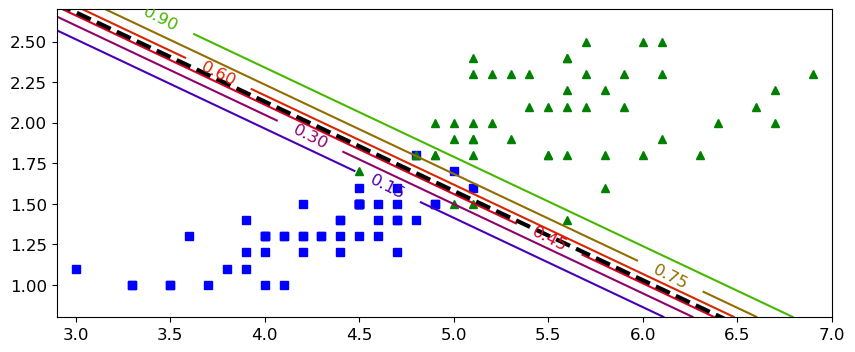

In [86]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], 'bs')
plt.plot(X[y==1, 0], X[y==1, 1], 'g^')

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, 'k--', linewidth=3)
plt.axis([2.9, 7, 0.8, 2.7])

### 4.6.4 소프트맥스 회귀

In [87]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [88]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1)
)
x0, x1

(array([[0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
         8.        ],
        [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
         8.        ],
        [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
         8.        ],
        ...,
        [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
         8.        ],
        [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
         8.        ],
        [0.        , 0.01603206, 0.03206413, ..., 7.96793587, 7.98396794,
         8.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.01758794, 0.01758794, 0.01758794, ..., 0.01758794, 0.01758794,
         0.01758794],
        [0.03517588, 0.03517588, 0.03517588, ..., 0.03517588, 0.03517588,
         0.03517588],
        ...,
        [3.46482412, 3.46482412, 3.46482412, ..., 3.46482412, 3.46482412,
         3.46482412],
        [3.4

In [89]:
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new

array([[0.        , 0.        ],
       [0.01603206, 0.        ],
       [0.03206413, 0.        ],
       ...,
       [7.96793587, 3.5       ],
       [7.98396794, 3.5       ],
       [8.        , 3.5       ]])

In [99]:
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

In [116]:
from matplotlib.colors import ListedColormap

<a list of 6 text.Text objects>

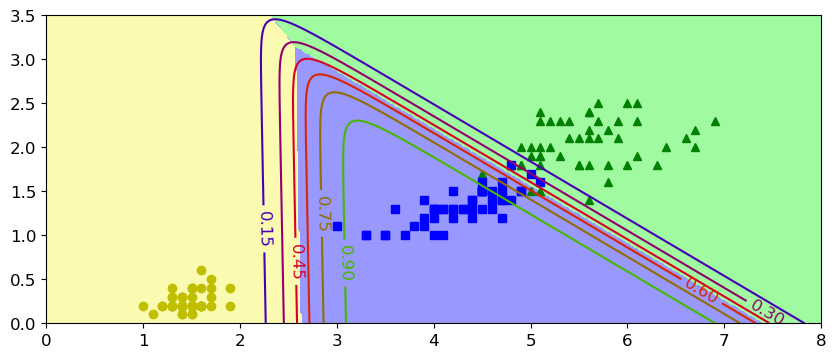

In [119]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris virginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris versicolor')
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='Iris setosa')

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

### 연습문제
**단계 1 : 데이터 준비**

In [121]:
X = iris['data'][:, (2, 3)]
y = iris['target']

In [122]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [123]:
np.random.seed(2042)

**단계 2 : 데이터 분할**

In [124]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

In [125]:
test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

In [126]:
rnd_indices = np.random.permutation(total_size)

In [127]:
X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]

X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]

X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [128]:
y_train[:5]

array([0, 1, 2, 1, 1])

In [131]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [132]:
y_train[:5]

array([0, 1, 2, 1, 1])

In [133]:
to_one_hot(y_train[:5])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [134]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

**단계 4 : 소프트맥스 함수 구현**

In [135]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

**단계 5 : 경사하강법 활용 훈련**

In [136]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

In [162]:
Theta = np.random.randn(n_inputs, n_outputs)
Theta

array([[ 0.63844637,  0.61608862,  0.53739165],
       [ 2.16968434,  0.08167019, -0.04731371],
       [ 0.72490157,  1.06711956,  2.04506174]])

In [163]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

In [164]:
for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
        # print(error)
        print(gradients)
        
    
    
    Theta = Theta - eta * gradients

0 6.101695333134016
[[ 0.62218423 -0.30549306 -0.31669117]
 [ 3.22359782 -1.37633499 -1.84726283]
 [ 1.1089903  -0.43684904 -0.67214126]]
500 0.7495955964003087
[[-0.12787783  0.0406489   0.08722893]
 [ 0.01993732 -0.01230197 -0.00763535]
 [ 0.04558461 -0.00280025 -0.04278436]]
1000 0.633586760104472
[[-0.09639016  0.02726899  0.06912117]
 [ 0.01709969 -0.01066788 -0.00643181]
 [ 0.03428076  0.00079905 -0.03507981]]
1500 0.5627809964824694
[[-0.0757086   0.01789321  0.0578154 ]
 [ 0.01439991 -0.00899943 -0.00540048]
 [ 0.02679658  0.00314605 -0.02994264]]
2000 0.5154218410707394
[[-0.06195895  0.01155791  0.05040105]
 [ 0.0122263  -0.00759661 -0.00462969]
 [ 0.02180504  0.00449722 -0.02630225]]
2500 0.48116101400112515
[[-0.05244435  0.00720676  0.0452376 ]
 [ 0.01053729 -0.00646217 -0.00407512]
 [ 0.01834933  0.00521195 -0.02356128]]
3000 0.45483325048430245
[[-0.04558076  0.00413705  0.04144371]
 [ 0.00922135 -0.00554356 -0.00367779]
 [ 0.01585887  0.00553701 -0.02139588]]
3500 0.433

In [175]:
# # print(Y_proba)
# logits = X_train.dot(Theta)
# # logits.shape
# Y_proba = softmax(logits)
# # Y_proba
# # print(Y_train_one_hot)
# # Y_train_one_hot * np.log(Y_proba + epsilon)
# # np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1).shape

array([[-3.66603998e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -1.14889590e+01, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -2.53526316e-05],
       [-0.00000000e+00, -1.13423362e+01, -0.00000000e+00],
       [-0.00000000e+00, -1.14889590e+01, -0.00000000e+00],
       [-3.11288670e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -1.21485573e+01, -0.00000000e+00],
       [-0.00000000e+00, -1.30832164e+01, -0.00000000e+00],
       [-0.00000000e+00, -1.25820183e+01, -0.00000000e+00],
       [-3.66603998e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -1.24380447e+01, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -1.67999199e-05],
       [-3.58810928e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -1.25129702e+01, -0.00000000e+00],
       [-0.00000000e+00, -1.09720946e+01, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -1.25565363e-05],
       [-0.00000000e+00, -1.27253733e+01

In [166]:
Theta

array([[ 3.68653944,  0.10079783, -1.99541063],
       [ 0.33885719,  1.11266289,  0.75252074],
       [-0.85514954,  1.11918494,  3.57304747]])

In [169]:
logits = X_valid.dot(Theta)
print(logits)
Y_proba = softmax(logits)
print(Y_proba)
y_predict = np.argmax(Y_proba, axis=1)
print(y_predict)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score


[[ 3.9737674   1.4366455  -0.81033307]
 [ 3.75604129  7.79056365  8.55598324]
 [ 4.02379532  1.99362915 -0.15202003]
 [ 4.10931028  1.88171065 -0.50932478]
 [ 4.01739008  5.11430287  4.21145941]
 [ 4.12878421  9.01449282  9.38375605]
 [ 3.53178084  9.01775385 10.79401941]
 [ 3.85276542  2.21746614  0.56258946]
 [ 3.95602389  1.77109657 -0.30252418]
 [ 3.98990961  1.88236286 -0.2272721 ]
 [ 4.09970242  6.56272124  6.03589439]
 [ 4.06421539  7.23162338  7.05151218]
 [ 3.77378481  7.45611258  8.04817434]
 [ 3.87544197  7.78991144  8.27393057]
 [ 4.15133165  6.33953646  5.60333757]
 [ 3.76244653  4.66988992  4.19250379]
 [ 3.4478672   8.34950391 10.0604543 ]
 [ 4.2207044   5.7819006   4.66297186]
 [ 3.77058219  9.01644944 10.22991407]
 [ 3.94961865  4.8917703   4.06095527]
 [ 3.98990961  1.88236286 -0.2272721 ]
 [ 3.96255823  6.89782452  6.82575596]
 [ 3.78672439  9.4621668  10.81297503]
 [ 3.78992701  7.90182994  8.63123531]
 [ 3.99644395  7.00909081  6.90100803]
 [ 3.92213817  1.65983028

0.9666666666666667

**단계 6 : 규제가 추가된 경사하강법 활용 훈련**

In [181]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1

In [182]:
Theta = np.random.randn(n_inputs, n_outputs)
Theta

array([[ 1.80988989, -0.54997293,  1.09200727],
       [ 0.43406129, -1.6441017 ,  0.51898445],
       [ 1.31686239,  0.44491099,  0.90549837]])

In [183]:
for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    
    error = Y_proba - Y_train_one_hot
    l2_loss_gradients = np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    gradients = 1/m * X_train.T.dot(error) + l2_loss_gradients
    
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
        # print(l2_loss_gradients)
        print(gradients)
        
    Theta = Theta - eta * gradients

0 5.038280239064085
[[ 0.36333915 -0.32131508 -0.04202407]
 [ 2.26853413 -1.56314812 -0.77449161]
 [ 0.92345439 -0.39640277 -0.26032444]]
500 0.5322201822520979
[[-0.01723926 -0.00861535  0.02585461]
 [ 0.00401139  0.00097933 -0.00544478]
 [ 0.00049345  0.00102868  0.0002304 ]]
1000 0.5035315271928776
[[-0.00783266 -0.0056792   0.01351186]
 [ 0.0016405   0.00093844 -0.00258192]
 [ 0.00024164  0.00019158 -0.0004217 ]]
1500 0.49465903889629914
[[-0.00455442 -0.00358059  0.00813501]
 [ 0.0009066   0.00061451 -0.00152113]
 [ 0.00018613  0.00011612 -0.00030217]]
2000 0.49128501840330063
[[-2.86400517e-03 -2.29687225e-03  5.16087742e-03]
 [ 5.58868425e-04  3.98210427e-04 -9.57078981e-04]
 [ 1.26067256e-04  7.70438841e-05 -2.03110642e-04]]
2500 0.4898942482434113
[[-1.85885695e-03 -1.50088315e-03  3.35974010e-03]
 [ 3.59243853e-04  2.61268303e-04 -6.20512157e-04]
 [ 8.41859318e-05  5.17713914e-05 -1.35957320e-04]]
3000 0.48929688012374906
[[-1.22584163e-03 -9.93315050e-04  2.21915668e-03]
 [ 

In [184]:
np.sum(np.square(Theta[1:]))

2.7051534130341

In [188]:
logits = X_valid.dot(Theta)
print(logits)
Y_proba = softmax(logits)
print(Y_proba)
y_predict = np.argmax(Y_proba, axis=1)
print(y_predict)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

[[ 3.91537722  1.35914678 -2.92259977]
 [-1.15289385  1.60265168  1.9021664 ]
 [ 3.43256049  1.39566588 -2.47630214]
 [ 3.47629478  1.40930908 -2.53367963]
 [ 0.88727394  1.53733182 -0.07268153]
 [-2.36037057  1.74059802  2.97169677]
 [-2.03018898  1.60967915  2.77243405]
 [ 3.3450919   1.36837949 -2.36154716]
 [ 3.65210171  1.37058473 -2.67076221]
 [ 3.5423311   1.38312531 -2.57353217]
 [-0.34163505  1.62180799  1.07175128]
 [-0.86818607  1.6446839   1.5754264 ]
 [-0.88961834  1.59121373  1.65032884]
 [-1.21893017  1.62883546  1.94201894]
 [-0.18813014  1.62291061  0.91714376]
 [ 1.3923927   1.46098574 -0.50145421]
 [-1.43760163  1.56061947  2.22890639]
 [ 0.22865027  1.61257528  0.51069868]
 [-2.16226161  1.6620467   2.85213914]
 [ 1.10681516  1.51225067 -0.2671416 ]
 [ 3.5423311   1.38312531 -2.57353217]
 [-0.53887424  1.60706217  1.2837363 ]
 [-2.53530774  1.68602523  3.20120673]
 [-1.26266446  1.61519226  1.99939643]
 [-0.64864485  1.61960275  1.38096633]
 [ 3.76187232  1.35804415

1.0

In [189]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    
    if iteration % 500 == 0:
        print(iteration, loss)
    
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, '조기 종료')
        break

0 2.897275838876366
500 0.5702751662442891
1000 0.5425654873413586
1500 0.5353090385301479
2000 0.5331256731252507
2500 0.5325827330917428
2736 0.5325454243382794
2737 0.532545425210158 조기 종료


In [193]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

**단계 8 : 전체 데이터셋 대한 예측 결과 그래프**

<a list of 10 text.Text objects>

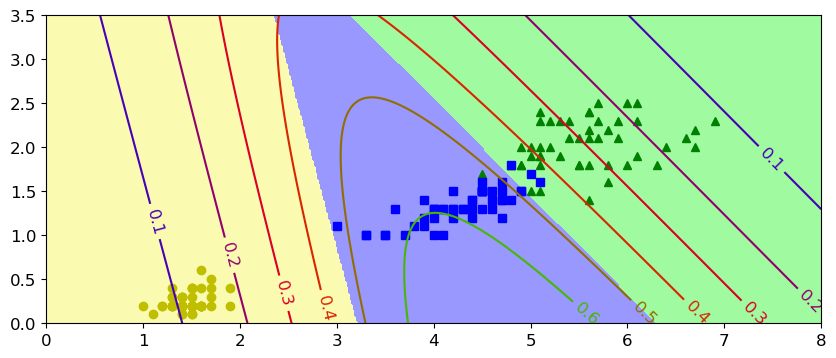

In [206]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris virginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris versicolor')
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='Iris setosa')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

**단계 9 : 테스트 세트 평가**

In [207]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333